<a href="https://colab.research.google.com/github/melvinaquartey/ml-homework/blob/main/ML_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Melvina Quartey RIN #662067086

### ML Homework 6

**Problem 1**

In [7]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.tree import plot_tree

# A.
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



# Print the first two principal components
print("First Two Principal Components:")
print(pca.components_)

First Two Principal Components:
[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]]


In [8]:
# Create a DataFrame to represent the first two principal components
pca_components_df = pd.DataFrame(pca.components_, columns=wine.feature_names)

# Display the DataFrame
print("Weights of original features in the first two principal components:")
print(pca_components_df)


Weights of original features in the first two principal components:
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  0.144329   -0.245188 -0.002051          -0.239320   0.141992   
1 -0.483652   -0.224931 -0.316069           0.010591  -0.299634   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.394661    0.422934             -0.298533         0.313429   
1      -0.065040    0.003360             -0.028779        -0.039302   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0        -0.088617  0.296715                      0.376167  0.286752  
1        -0.529996  0.279235                      0.164496 -0.364903  


In [9]:
# B.
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.36198848 0.1920749 ]


Accuracy: 0.9722222222222222


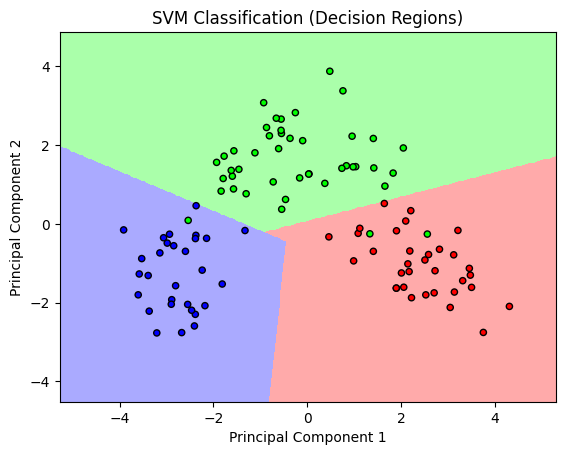

In [14]:
# C. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, random_state=42)

# Train SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a colormap for the classes
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot decision regions
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Classification (Decision Regions)')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()



In [15]:
#D.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Train SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

# Train Decision Tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=3)
dt_classifier.fit(X_train, y_train)

# Predictions
svm_predictions = svm_classifier.predict(X_test)
dt_predictions = dt_classifier.predict(X_test)

# Evaluation metrics for SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')

# Evaluation metrics for Decision Tree
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')

# Display results
print("SVM Classifier:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print()
print("Decision Tree Classifier (max_depth=3):")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)


SVM Classifier:
Accuracy: 0.9444444444444444
Precision: 0.9518518518518518
Recall: 0.9444444444444444

Decision Tree Classifier (max_depth=3):
Accuracy: 0.9305555555555556
Precision: 0.94140625
Recall: 0.9305555555555556


In all three (Accuracy, precision and recall), SVM performs better than the decision tree classifier, though the difference is not great.

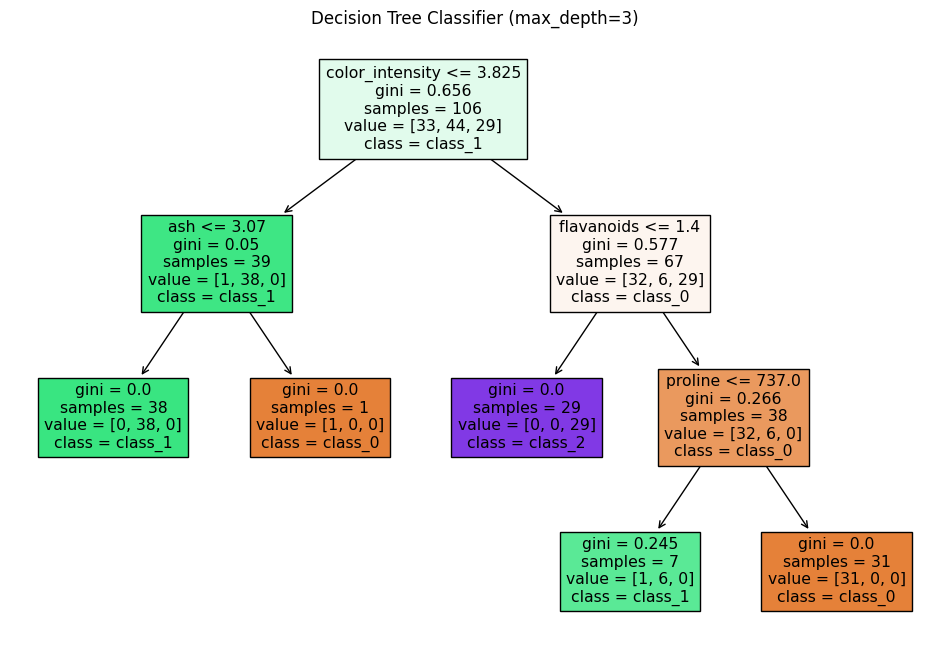

In [16]:
# E. Plot Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=wine.feature_names, class_names=wine.target_names)
plt.title("Decision Tree Classifier (max_depth=3)")
plt.show()


**Problem 2**

In [39]:
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Combine train and test sets
X_combined = np.concatenate((X_train, X_test), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)

# Flatten the images to make them suitable for training
X_combined_flat = X_combined.reshape(X_combined.shape[0], -1)

# Train a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_combined_flat, y_combined)

# Retrieve feature importance scores
feature_importance = rf_classifier.feature_importances_

# Display feature importance scores
print("Feature Importance Scores:")
print(feature_importance)


170498071/170498071 [==============================] - 2s 0us/step


<ipython-input-39-d8e8027d5db1>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_combined_flat, y_combined)


Feature Importance Scores:
[0.00029222 0.00028866 0.00039641 ... 0.00040679 0.00031969 0.00041299]


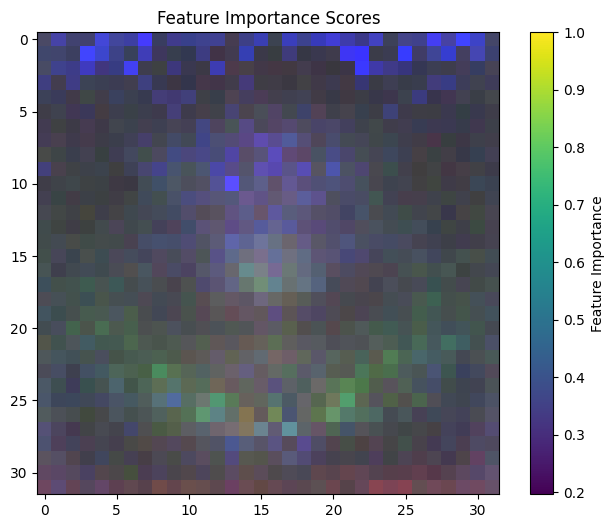

In [53]:

# Reshape feature importance scores back to the shape of the original image
feature_importance_image = (feature_importance*1000).reshape(X_train.shape[1:])

# Plot the feature importance image
plt.figure(figsize=(8, 6))
plt.imshow(feature_importance_image, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Feature Importance')
plt.title('Feature Importance Scores')
plt.show()


I scaled up the feature importance array values by a factor of 1000 in order to get some signals in the color map. Otherwise, the map presents a black image.

**Problem 3**

In [8]:
# Load the numpy file
data = np.load('/surface_temp.npy')
print(data)

[370.3499701  370.65259997 372.77770567 374.20878713 373.85554369
 373.35876556 373.01146637 373.61196473 373.73017769 374.00751705
 373.15548908 373.1830187  373.33269497 373.77308538 374.11994366
 373.37417903 373.40929019 373.74071357 373.43182988 373.7558131
 373.87082585 373.58817855 373.53556374 373.49163891 373.35422914
 373.35821419 373.78947706 373.26457214 373.23941327 374.0205963
 373.67976501 373.84145055 373.95281383 373.3631328  372.92187184
 373.33619794 373.65718803 373.73185716 373.56300539 373.00976633
 373.36579122 374.14076212 373.87606273 373.84132333 373.42971681
 373.20732767 373.98093107 373.91616418 372.30080014 371.140588
 369.88283163 370.56989437 372.54990937 374.24396448 373.59678061
 373.21975238 373.11682209 373.322382   373.90755379 373.76647599
 373.22464114 373.1006819  373.22267795 373.6964242  373.43546393
 373.4380541  373.12321389 373.53772295 373.38203862 373.89293308
 373.46555544 373.42443498 373.41561226 373.60373962 373.35001407
 373.47632858 

In [10]:
# Create a DataFrame with time steps as the feature and temperatures as the target
df = pd.DataFrame(data, columns=['Temperature'])
df['Time Step'] = np.arange(1, len(data) + 1)

# Print the DataFrame
print(df)

     Temperature  Time Step
0     370.349970          1
1     370.652600          2
2     372.777706          3
3     374.208787          4
4     373.855544          5
..           ...        ...
995   374.186068        996
996   374.002284        997
997   372.333669        998
998   370.953458        999
999   369.850478       1000

[1000 rows x 2 columns]


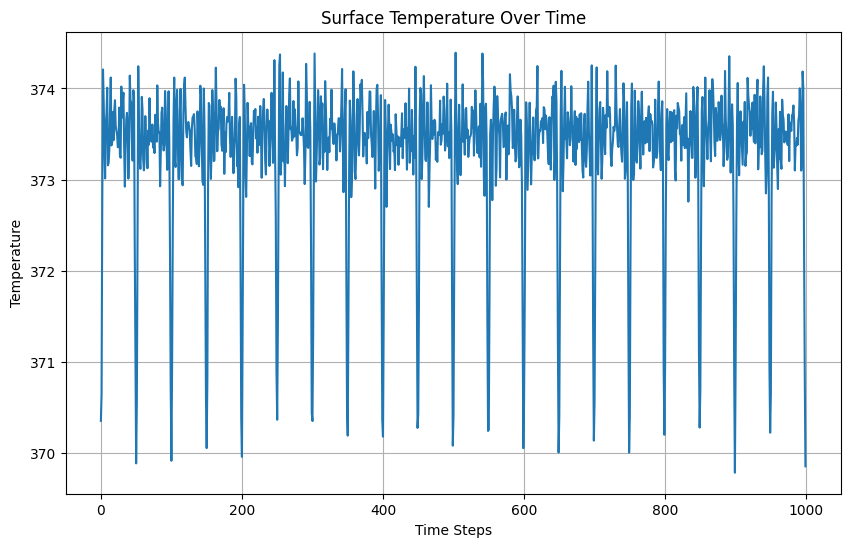

In [19]:
import matplotlib.pyplot as plt
# Plot surface temperature over time
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Surface Temperature Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target (y)
X = df['Time Step'].values.reshape(-1, 1)  # Reshape to 2D array
y = df['Temperature'].values

# Reshape X for LSTM input (samples, time steps, features)
X_reshaped = X.reshape(X.shape[0], 1, X.shape[1])
# Standardize the target temperatures
scaler_y = StandardScaler()
y_standardized = scaler_y.fit_transform(y.reshape(-1, 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_reshaped, y_standardized, epochs=150, batch_size=32, verbose=0)

# Predict the temperatures for the next 10 timesteps
future_timesteps = 10
predicted_values_standardized = []
current_input = X_reshaped[-1].reshape(1, 1, 1)  # Use the last input as the starting point
for _ in range(future_timesteps):
    predicted_value_standardized = model.predict(current_input)[0][0]
    predicted_values_standardized.append(predicted_value_standardized)
    current_input = np.roll(current_input, -1)  # Shift the input one step forward
    current_input[-1][-1][-1] = predicted_value_standardized  # Update the last input with the predicted value

# Inverse transform the predicted values
predicted_values = scaler_y.inverse_transform(np.array(predicted_values_standardized).reshape(-1, 1))

# Print the predicted temperatures for the next 10 timesteps
print("Predicted temperatures for the next 10 timesteps:")
for i, temp in enumerate(predicted_values, 1):
    print(f"Time Step {X[-1][0] + i}: {temp[0]}")

# Evaluate the model
y_pred_standardized = model.predict(X_reshaped)
y_pred = scaler_y.inverse_transform(y_pred_standardized)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")



1/1 [==============================] - 0s 22ms/step
Predicted temperatures for the next 10 timesteps:
Time Step 1001: 373.32659912109375
Time Step 1002: 370.2242126464844
Time Step 1003: 372.3015441894531
Time Step 1004: 371.05316162109375
Time Step 1005: 372.0074462890625
Time Step 1006: 371.05316162109375
Time Step 1007: 372.0074462890625
Time Step 1008: 371.05316162109375
Time Step 1009: 372.0074462890625
Time Step 1010: 371.05316162109375
32/32 [==============================] - 0s 2ms/step
Mean Squared Error: 0.5896202928266532
Mean Absolute Error: 0.4567465756270854


Predicted temperatures for the next 10 timesteps:

Time Step 1001: 373.32659912109375

Time Step 1002: 370.2242126464844

Time Step 1003: 372.3015441894531

Time Step 1004: 371.05316162109375

Time Step 1005: 372.0074462890625

Time Step 1006: 371.05316162109375

Time Step 1007: 372.0074462890625

Time Step 1008: 371.05316162109375

Time Step 1009: 372.0074462890625

Time Step 1010: 371.05316162109375

Mean Squared Error: 0.5896202928266532

Mean Absolute Error: 0.4567465756270854



1/1 [==============================] - 0s 24ms/step


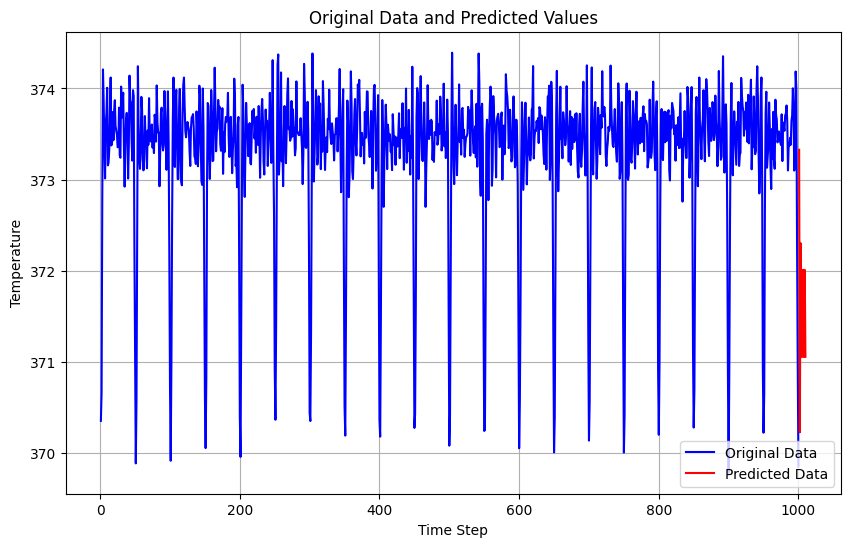

In [37]:
import matplotlib.pyplot as plt

# Plot the original temperature data
plt.figure(figsize=(10, 6))
plt.plot(X, y, label='Original Data', color='blue')

# Plot the predicted temperatures for the next 10 timesteps
future_timesteps = 10
predicted_values = []
current_input = X_reshaped[-1].reshape(1, 1, 1)  # Use the last input as the starting point
for _ in range(future_timesteps):
    predicted_value_standardized = model.predict(current_input)[0][0]
    predicted_values.append(predicted_value_standardized)
    current_input = np.roll(current_input, -1)  # Shift the input one step forward
    current_input[-1][-1][-1] = predicted_value_standardized  # Update the last input with the predicted value

# Inverse transform the predicted values
predicted_values = scaler_y.inverse_transform(np.array(predicted_values).reshape(-1, 1))

# Generate time steps for the predicted values
time_steps_predicted = np.arange(X[-1][0] + 1, X[-1][0] + future_timesteps + 1)

# Concatenate original and predicted data
#X_all = np.concatenate((X, time_steps_predicted.reshape(-1, 1)))
#y_all = np.concatenate((y.reshape(-1, 1), predicted_values))

# Plot the original data and predicted values
plt.plot(time_steps_predicted.reshape(-1, 1), predicted_values, label='Predicted Data', color='red', linestyle='-')


plt.title('Original Data and Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

